In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time
import sys

from ML_matcher_helpers import *

# MLPRegressor $ \rightarrow $ solver = adam
Multi-layer Perceptron regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [2]:
# Load trainning data
NPions = "10"
trainning_data, trainning_data_MatchTruth, trainning_data_NPairsMCHTracks = load_data(NPions, nMCHTracks="50000")

# Scale trainning data
scaler = StandardScaler()
scaler.fit(trainning_data)
trainning_data = scaler.transform(trainning_data)

Data not loaded! Continuing...
Loading data_50000MCHTraks_20Mu_10PiPerEvent
Loaded data in  1.1608255541834902  minutes ( 69.64953325100942  seconds)
N MCH Tracks = 50000
N pairs = 1368617


In [13]:
# MLPRegressor trainning
hiddenLayersConfig=(30,30,20)
mlpr = MLPRegressor_initAndTrain(hiddenLayersConfig,
                                solver = 'adam',
                                max_iter = 300,
                                activation = 'relu',
                                trainning_data = trainning_data,
                                trainning_data_MatchTruth = trainning_data_MatchTruth)

mlpr trainning time =  1.2012561618331044  minutes
Trainning Accuracy:  0.9530308887230481


In [4]:
# Load test data
NPions = "10"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.001350521583420535  minutes ( 0.0810312950052321  seconds)
N MCH Tracks = 1000
N pairs = 27873


In [5]:
# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

Prediction accuracy:
 0.9675152002351717


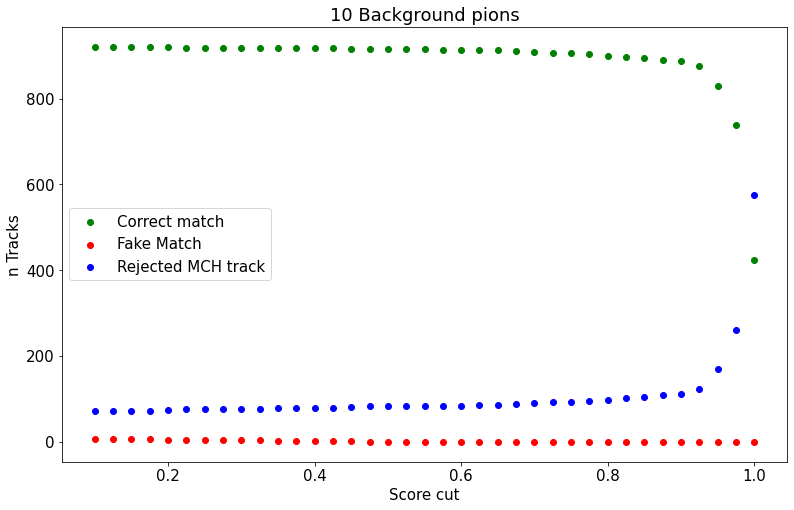

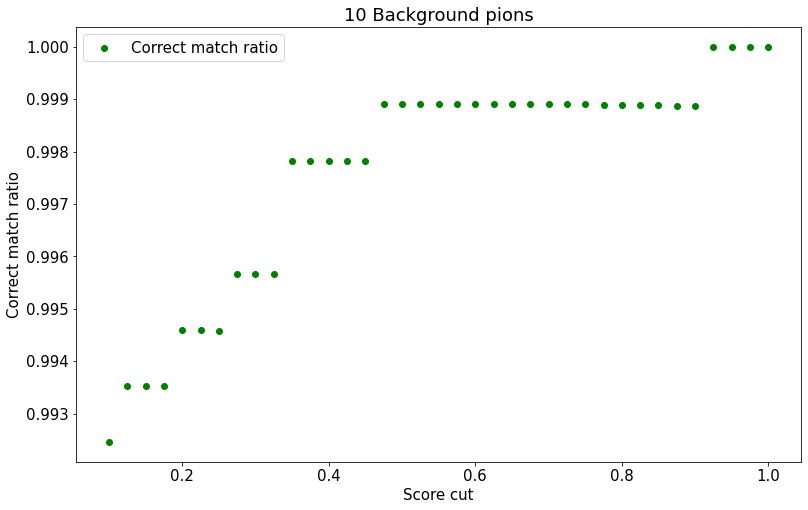

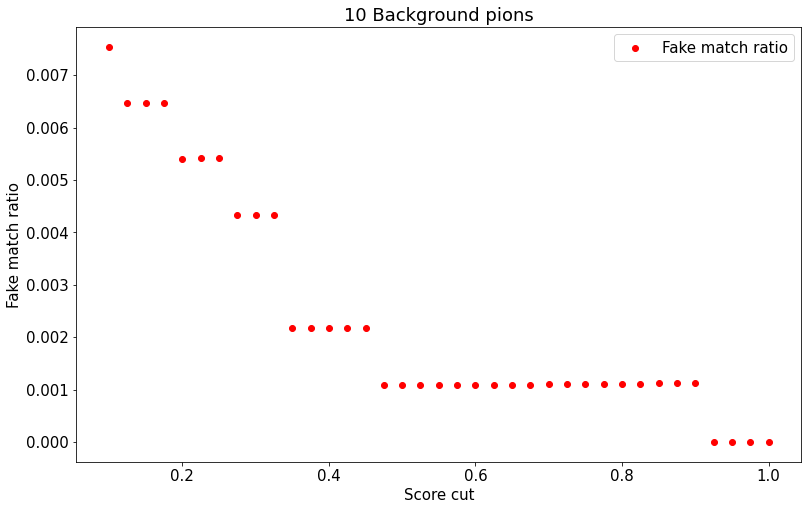

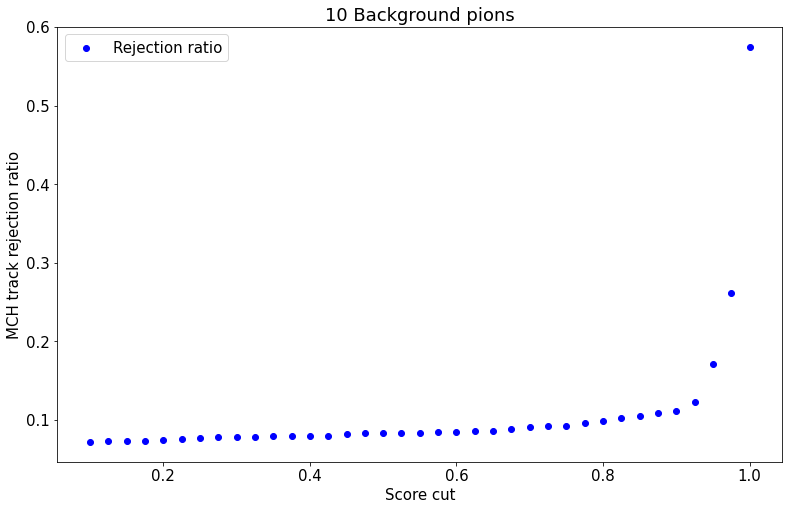

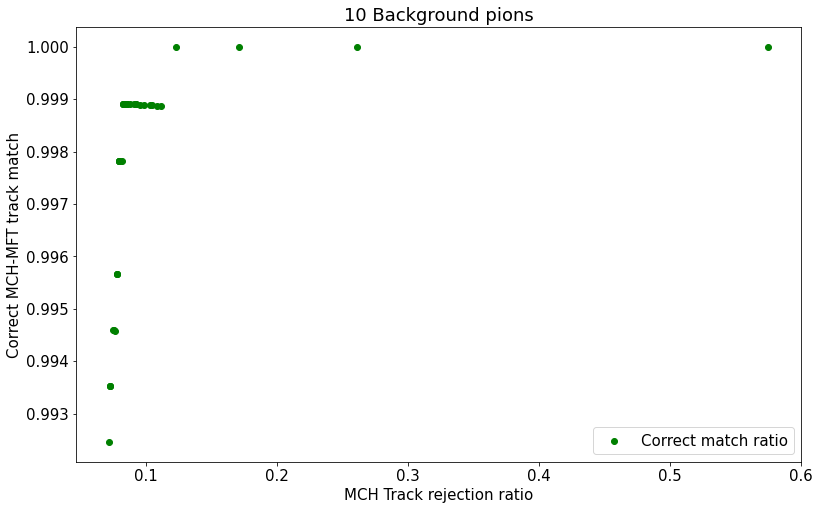

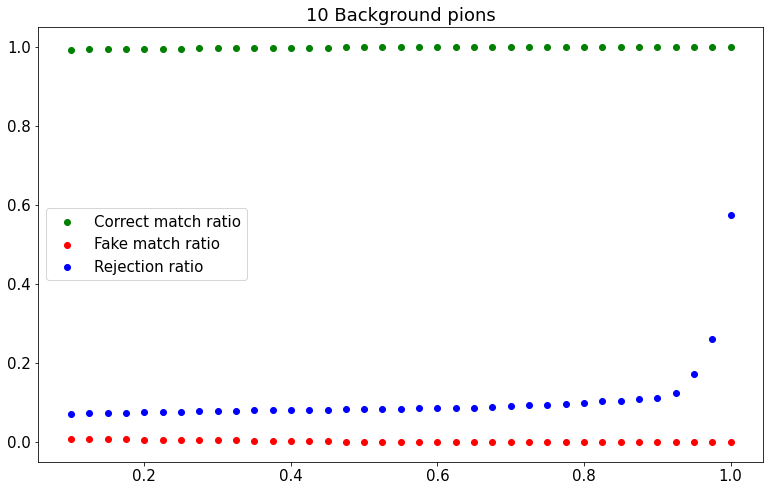

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [921. 921. 921. 921. 920. 919. 918. 918. 918. 918. 918. 918. 918. 918.
 916. 916. 916. 916. 915. 914. 914. 913. 913. 911. 908. 906. 906. 903.
 900. 896. 894. 890. 887. 877. 829. 739. 425.]
fake matches:  [7. 6. 6. 6. 5. 5. 5. 4. 4. 4. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
no matches:  [ 72.  73.  73.  73.  75.  76.  77.  78.  78.  78.  80.  80.  80.  80.
  82.  83.  83.  83.  84.  85.  85.  86.  86.  88.  91.  93.  93.  96.
  99. 103. 105. 109. 112. 123. 171. 261. 575.]


In [6]:
# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

In [7]:
test_data_matches = np.where(test_data_MatchTruth == 1)
first_test_data_match=test_data_matches[0][0]
print("Index of first_test_data_match: ",first_test_data_match)
Match_pred_single = mlpr.predict(test_data[first_test_data_match].reshape(1, -1))
print("Score:",Match_pred_single)

Index of first_test_data_match:  10
Score: [0.99869182]


In [8]:
print("Indexes of correct matches (input MC):")
print(test_data_matches)

Indexes of correct matches (input MC):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   945,   960,   991,  1019,  1062,
        1081,  1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,
        1335,  1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,
        1546,  1578,  1591,  1636,  1661,  1671,  1703,  1733,  1748,
        1784,  1804,  1857,  1876,  1903,  1944,  1965,  1974,  2001,
        2037,  2061,  2084,  2121,  2164,  2181,  2208,  2261,  2314,
        2345,  2361,  2402,  2422,  2476,  2491,  2520,  2576,  2583,
        2620,  2685,  2692,  2747,  2777,  2803,  2824,  2850,  2889,
        2918,  2933,  2962,  2991,  3029,  3049,  3076,  3117,  3179,
        3194,  3218,  3247,  3277,  3294,  3325,  3364,  3393,  3423,
        3448,  3465,  3530,  3544,  3563,  3586,  

In [9]:
print("Indexes of predicted matches for test data (score > 0.5):")
print(np.where(Match_pred > 0.5))

Indexes of predicted matches for test data (score > 0.5):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   960,   991,  1019,  1062,  1081,
        1108,  1140,  1212,  1237,  1271,  1292,  1307,  1335,  1364,
        1396,  1421,  1448,  1453,  1489,  1500,  1523,  1546,  1578,
        1591,  1671,  1703,  1733,  1748,  1784,  1804,  1857,  1876,
        1903,  1944,  1965,  1974,  2001,  2037,  2061,  2084,  2121,
        2164,  2181,  2208,  2261,  2314,  2345,  2361,  2402,  2422,
        2476,  2491,  2520,  2576,  2583,  2620,  2685,  2747,  2777,
        2803,  2823,  2824,  2850,  2851,  2889,  2918,  2933,  2962,
        2991,  3029,  3049,  3076,  3117,  3194,  3218,  3246,  3247,
        3277,  3294,  3325,  3343,  3364,  3393,  3423,  3448,  3465,
        3530,  3544,  3563,  35

# Evaluate MLP Regressor prediction at higher multiplicities

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_400PiPerEvent
Loaded data in  0.02506607231674328  minutes ( 1.5039643390045967  seconds)
N MCH Tracks = 1000
N pairs = 382091
Prediction accuracy:
 0.8444938394859701


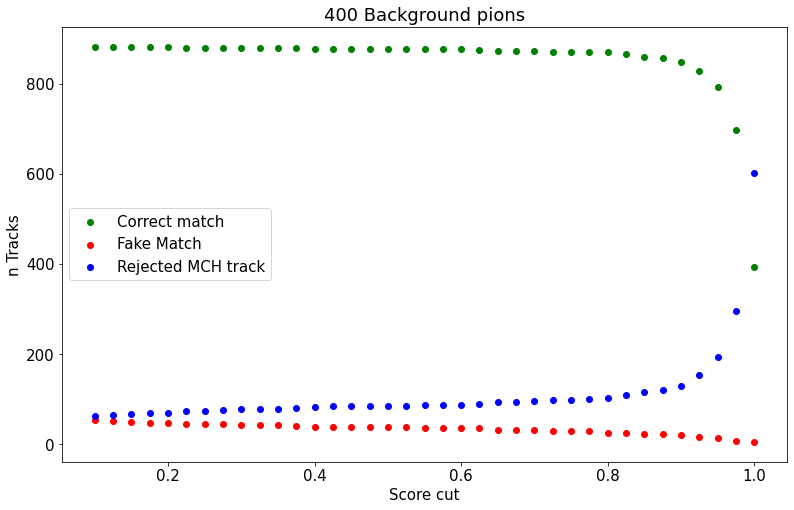

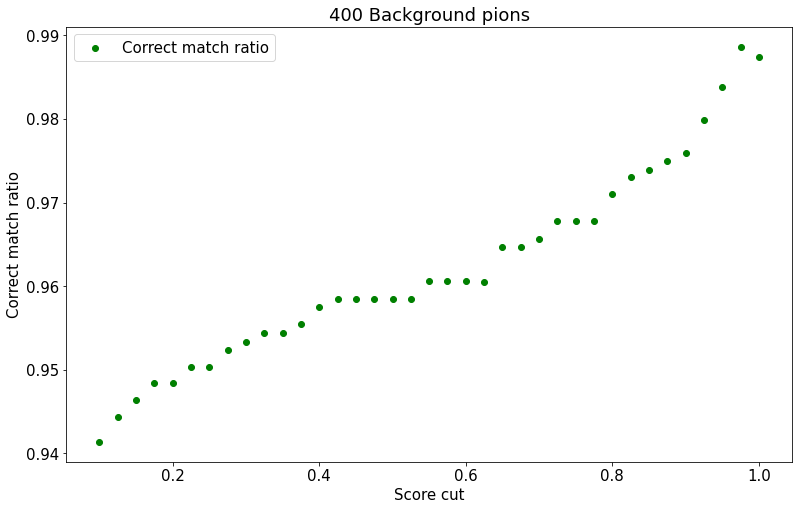

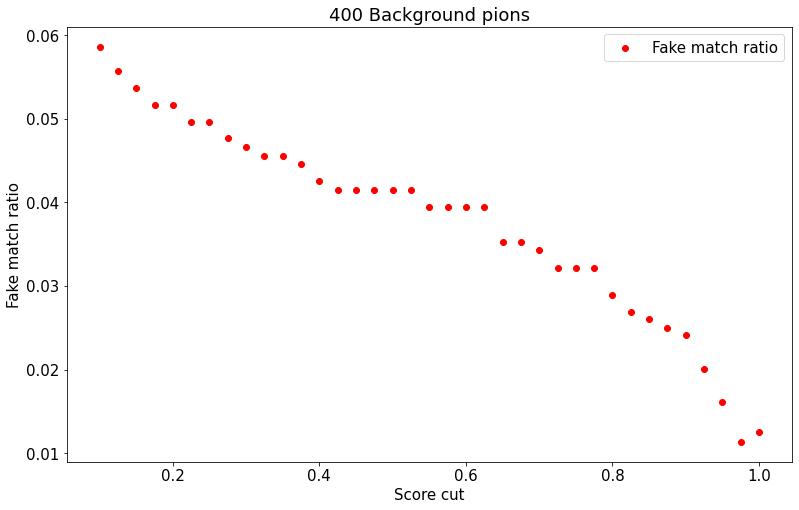

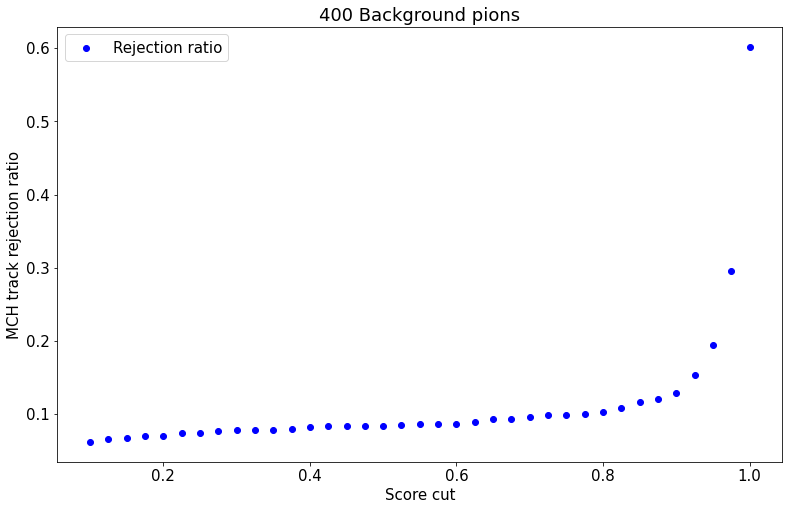

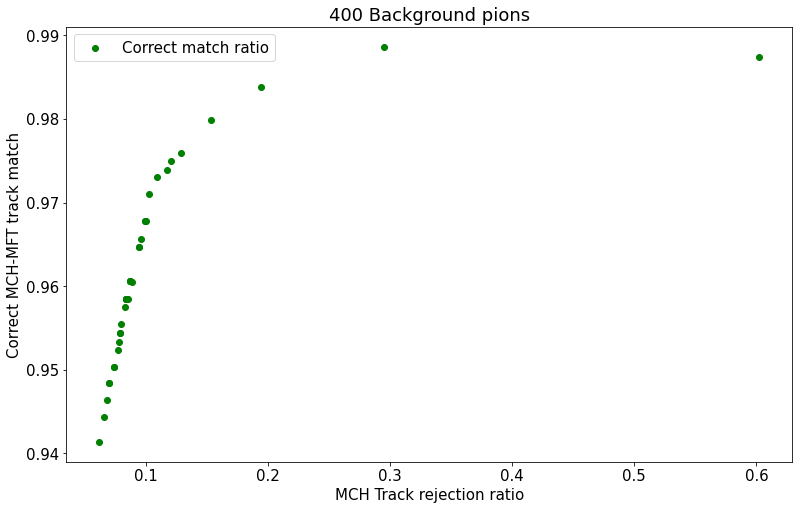

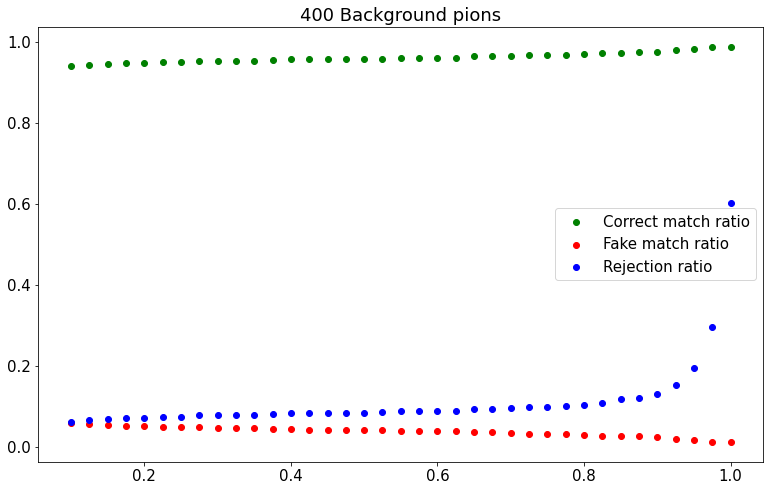

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [883. 882. 882. 882. 882. 880. 880. 879. 879. 879. 879. 879. 878. 878.
 878. 878. 878. 877. 877. 877. 877. 875. 874. 874. 873. 872. 872. 871.
 871. 867. 860. 857. 850. 830. 793. 697. 393.]
fake matches:  [55. 52. 50. 48. 48. 46. 46. 44. 43. 42. 42. 41. 39. 38. 38. 38. 38. 38.
 36. 36. 36. 36. 32. 32. 31. 29. 29. 29. 26. 24. 23. 22. 21. 17. 13.  8.
  5.]
no matches:  [ 62.  66.  68.  70.  70.  74.  74.  77.  78.  79.  79.  80.  83.  84.
  84.  84.  84.  85.  87.  87.  87.  89.  94.  94.  96.  99.  99. 100.
 103. 109. 117. 121. 129. 153. 194. 295. 602.]


In [10]:
# Load test data
NPions = "400"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_800PiPerEvent
Loaded data in  0.05933860011670428  minutes ( 3.560316007002257  seconds)
N MCH Tracks = 1000
N pairs = 757144
Prediction accuracy:
 0.7099223117554694


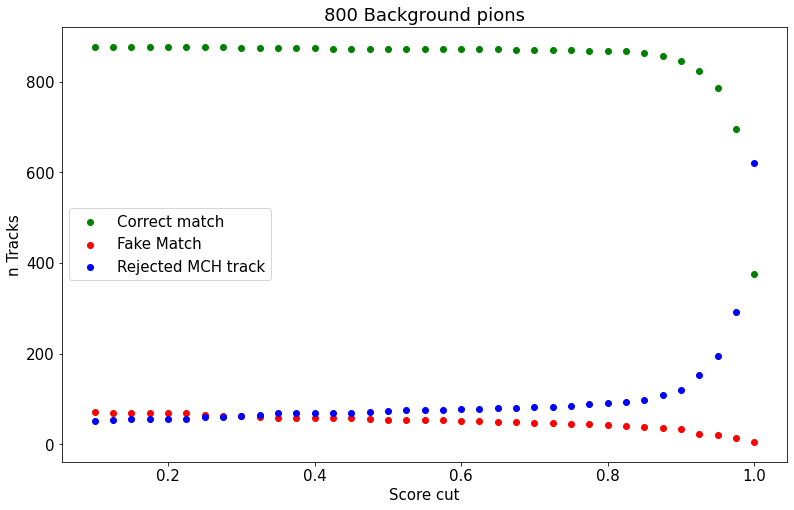

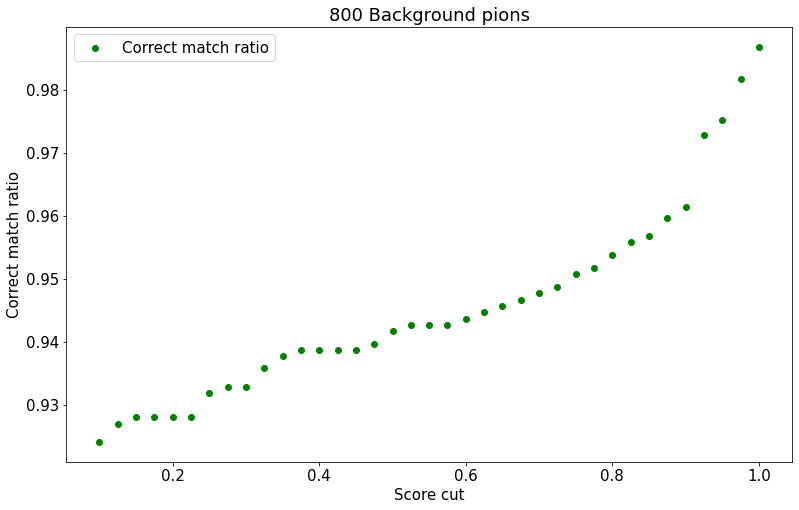

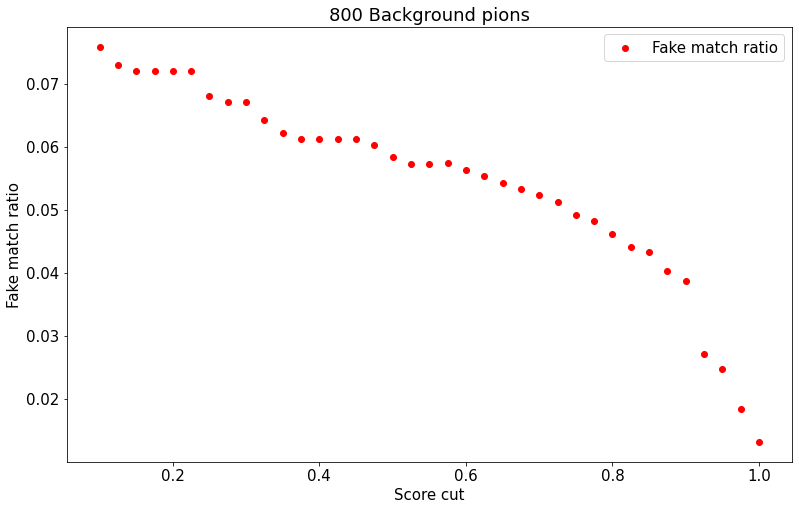

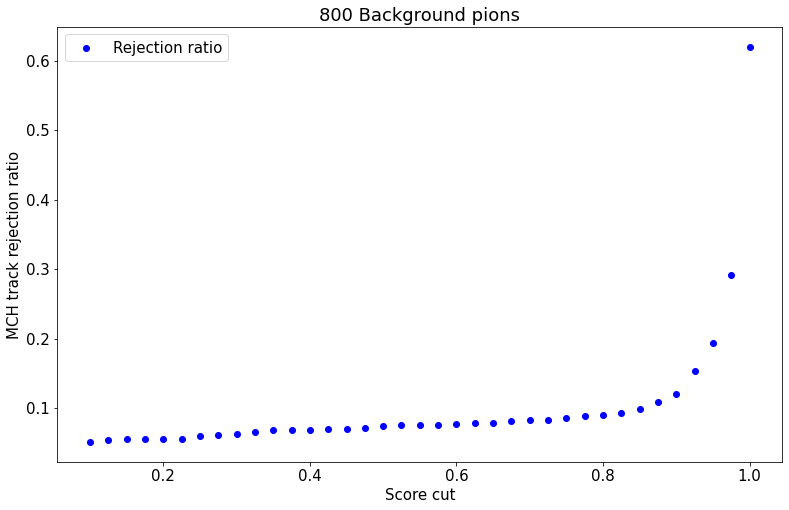

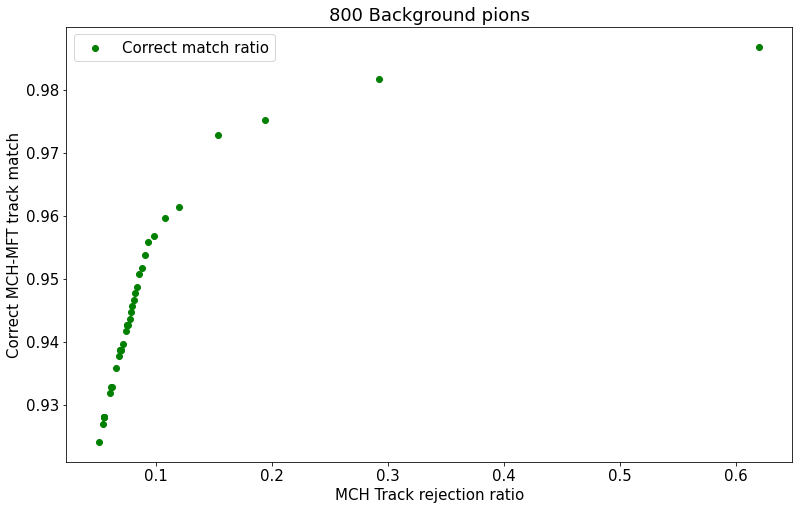

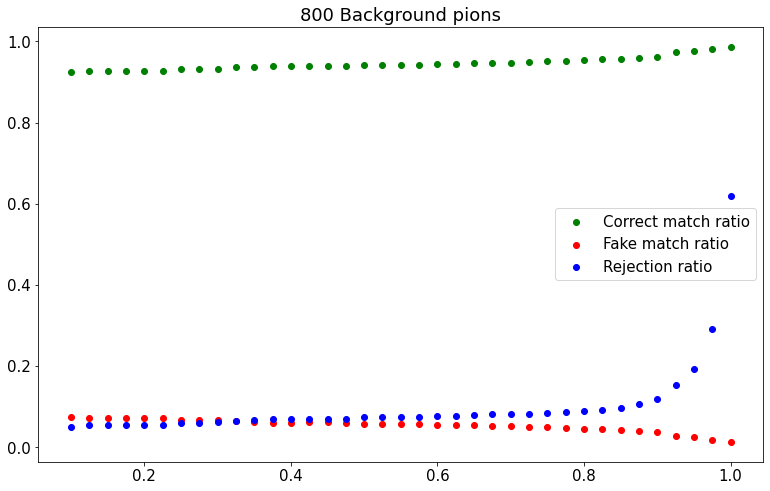

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [877. 877. 877. 877. 877. 877. 876. 876. 875. 875. 874. 874. 874. 873.
 873. 873. 872. 872. 872. 871. 871. 871. 871. 870. 870. 870. 870. 868.
 868. 867. 863. 856. 846. 824. 786. 695. 375.]
fake matches:  [72. 69. 68. 68. 68. 68. 64. 63. 63. 60. 58. 57. 57. 57. 57. 56. 54. 53.
 53. 53. 52. 51. 50. 49. 48. 47. 45. 44. 42. 40. 39. 36. 34. 23. 20. 13.
  5.]
no matches:  [ 51.  54.  55.  55.  55.  55.  60.  61.  62.  65.  68.  69.  69.  70.
  70.  71.  74.  75.  75.  76.  77.  78.  79.  81.  82.  83.  85.  88.
  90.  93.  98. 108. 120. 153. 194. 292. 620.]


In [11]:
# Load test data
NPions = "800"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")




Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_1200PiPerEvent
Loaded data in  0.09376394629992622  minutes ( 5.625836777995573  seconds)
N MCH Tracks = 1000
N pairs = 1148900
Prediction accuracy:
 0.3777745886005862


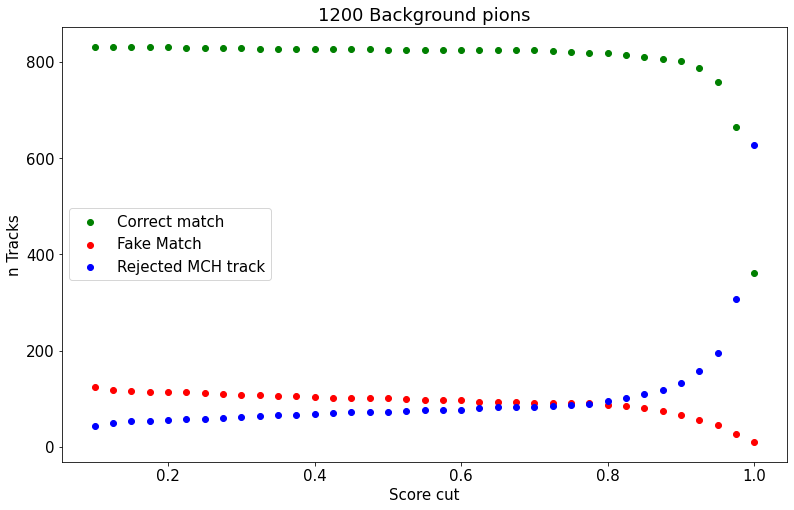

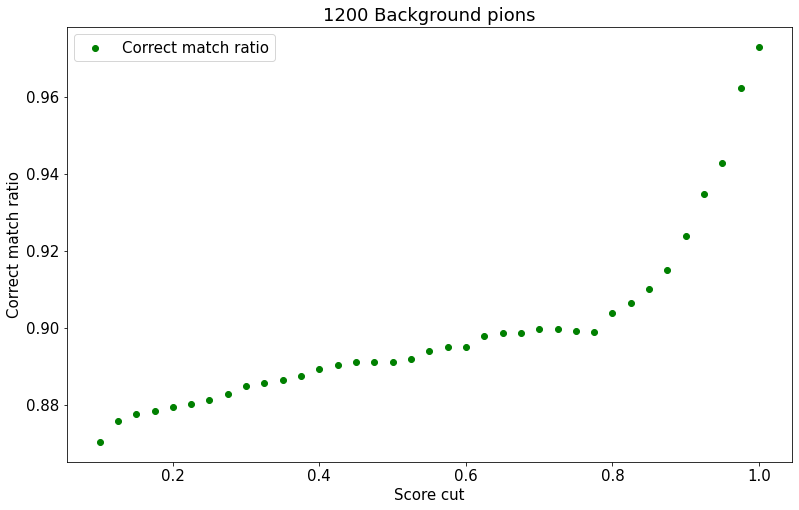

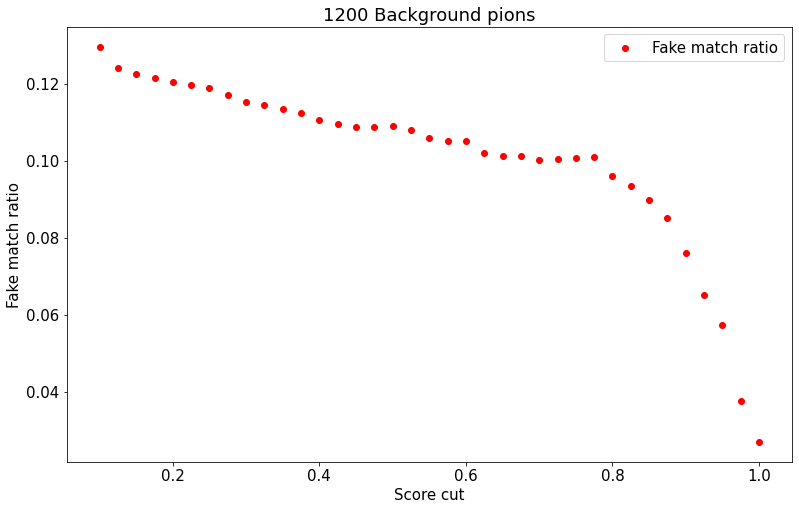

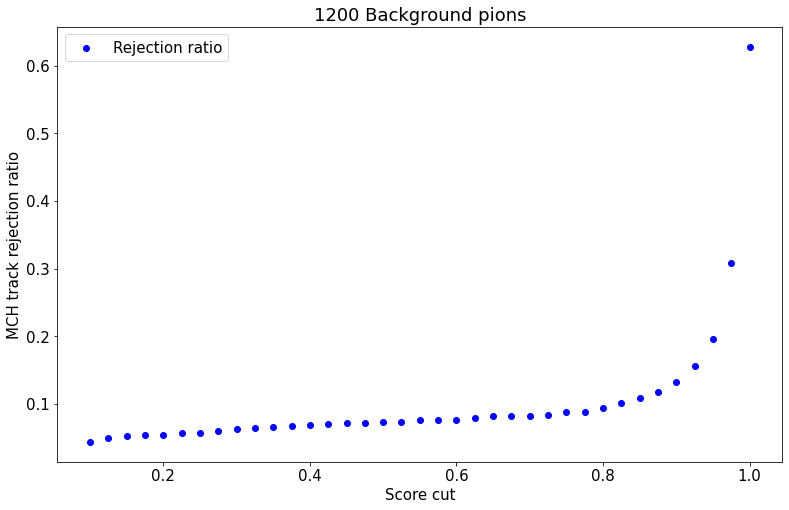

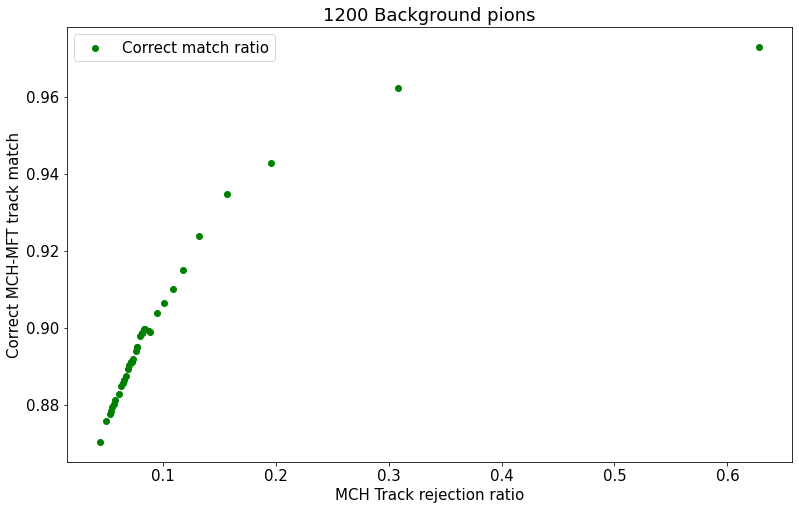

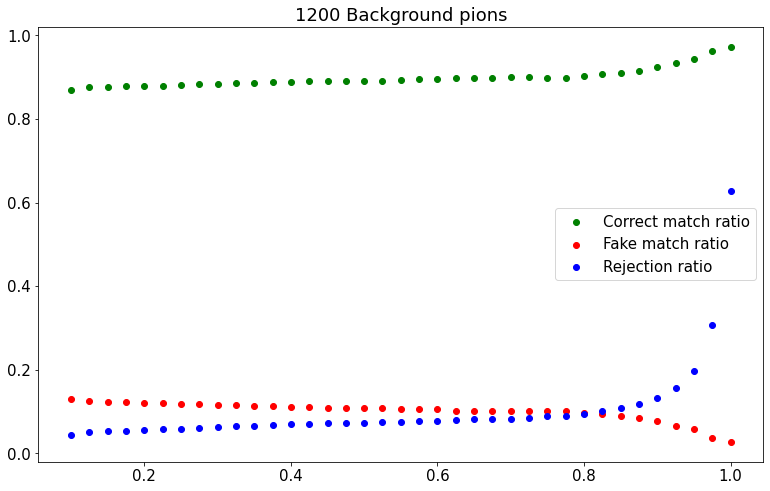

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [832. 832. 831. 831. 831. 830. 830. 829. 829. 828. 828. 828. 828. 828.
 827. 827. 826. 826. 826. 826. 826. 826. 825. 825. 825. 824. 820. 819.
 818. 815. 811. 807. 802. 788. 758. 666. 362.]
fake matches:  [124. 118. 116. 115. 114. 113. 112. 110. 108. 107. 106. 105. 103. 102.
 101. 101. 101. 100.  98.  97.  97.  94.  93.  93.  92.  92.  92.  92.
  87.  84.  80.  75.  66.  55.  46.  26.  10.]
no matches:  [ 44.  50.  53.  54.  55.  57.  58.  61.  63.  65.  66.  67.  69.  70.
  72.  72.  73.  74.  76.  77.  77.  80.  82.  82.  83.  84.  88.  89.
  95. 101. 109. 118. 132. 157. 196. 308. 628.]


In [12]:
# Load test data
NPions = "1200"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")